# Большой проверочный проект по обработке и визуализации данных

## Обзор

Вы планируете посмотреть какой-то фильм. Можете ли Вы доверять онлайн-рейтингам и отзывам о фильмах? *Особенно* если та компания, которая занимается рейтингами и отзывами, *также* зарабатывает на продаже билетов на фильмы. Есть ли у таких компаний тенденция выдавать завышенные или заниженные рейтинги?

### Цель проекта:

**Цель проекта - выполнить шаги по мотивам статьи на сайте fivethirtyeight.com о рейтингах и посмотреть, сможем ли мы прийти к тем же выводам, которые приведены в статье. Вы будете применять Ваши навыки работы с pandas и навыки визуализации данных для того, чтобы определить, предоставляла ли компания Fandango завышенные рейтинги в 2015 году для того, чтобы продавать больше билетов.**

---
----

## Часть 1: Исследуем данные


### Данные

Исходные данные для статьи [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) находятся в свободном доступе по следующей ссылке на github: https://github.com/fivethirtyeight/data. Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом файле агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

-----
#### all_sites_scores.csv

Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

----
----

#### fandango_scape.csv

Фильм `fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

----

In [116]:
#ИМПОРТИРУЕМ БИБЛИОТЕКИ, КОТОРЫЕ НАМ ПОНАДОБЯТСЯ
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Часть 2: Сравниваем рейтинги Fandango и другие пользовательские рейтинги

Сначала давайте изучим рейтинги Fandango и посмотрим, совпадут ли результаты нашего анализа с выводами в статье.

In [118]:
fandango = pd.read_csv("fandango_scrape.csv")

In [119]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [120]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [121]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Изучим связь между популярностью фильма и его рейтингом. Нарисуем график scatterplot, показывающий связь между колонками RATING и VOTES.**

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

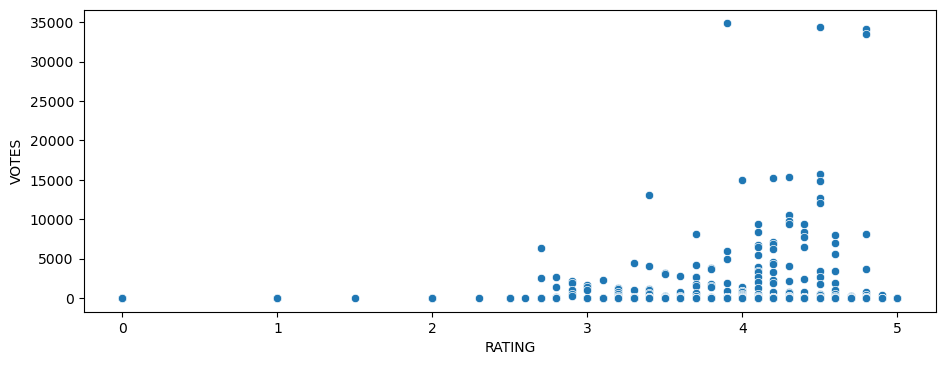

In [122]:
plt.figure(figsize=(11,4),dpi=100)

sns.scatterplot(x='RATING',y='VOTES',data=fandango)

In [123]:
#ВЫЧИСЛИМ КОРРЕЛЯЦИЮ МЕЖДУ КОЛОНКАМИ
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Добавим в датафрейм колонку с годом выпуска фильма**

Сделаем предположение, что каждая строка в колонке FILM содержит значение в следующем формате:

    Название Фильма (Год)
    

In [124]:
title = "Название Фильма (Год)"
title.split('(')[-1].replace(')','')

'Год'

In [125]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')',''))

**Узнаем сколько фильмов содержится в наборе данных Fandango, в разбивке по годам**

In [126]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

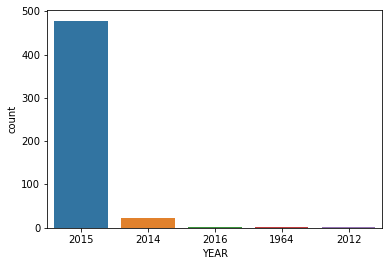

In [127]:
sns.countplot(x = 'YEAR', data = fandango)

**10 фильмов с наибольшим количеством голосов**

In [128]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Количество фильмов с нулевым количеством голосов**

In [129]:
fandango['VOTES'].value_counts()[0]

69

**Удалим те фильмы, у которых нет ни одного голоса**

In [130]:
fandango = fandango.loc[fandango['VOTES'] != 0]

In [133]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**Сравним колонки STARS и RATING на графике**

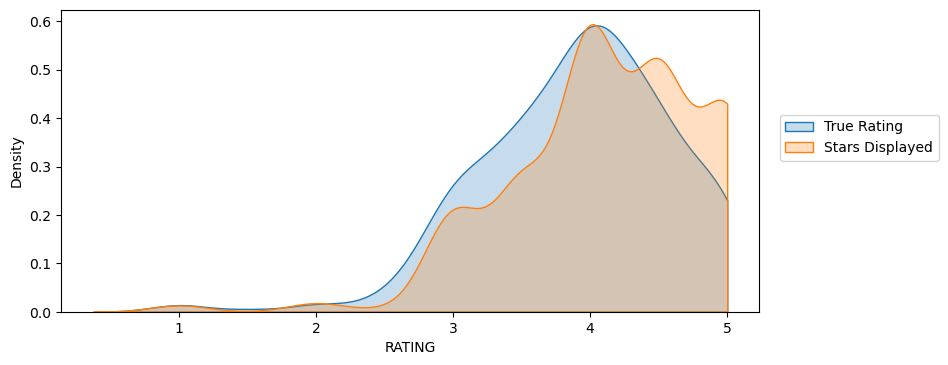

In [135]:
fig = plt.figure(figsize =(9,4), dpi = 100) 

sns.kdeplot(data=fandango,x='RATING',clip=[0,5], shade = True, label = 'True Rating')
sns.kdeplot(data=fandango,x='STARS',clip=[0,5], shade = True, label = 'Stars Displayed')

plt.legend(loc = (1.03,0.5))

**Численно оценить разницу между колонками STARS и RATING**

In [136]:
fandango['STARS_DIFF'] = fandango['STARS'] - fandango['RATING']

In [137]:
fandango['STARS_DIFF'] = np.round(fandango['STARS_DIFF'],1)

In [138]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


**Отобразить на графике count plot сколько раз встречается то или иное значение разницы между STAR и RATING:**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

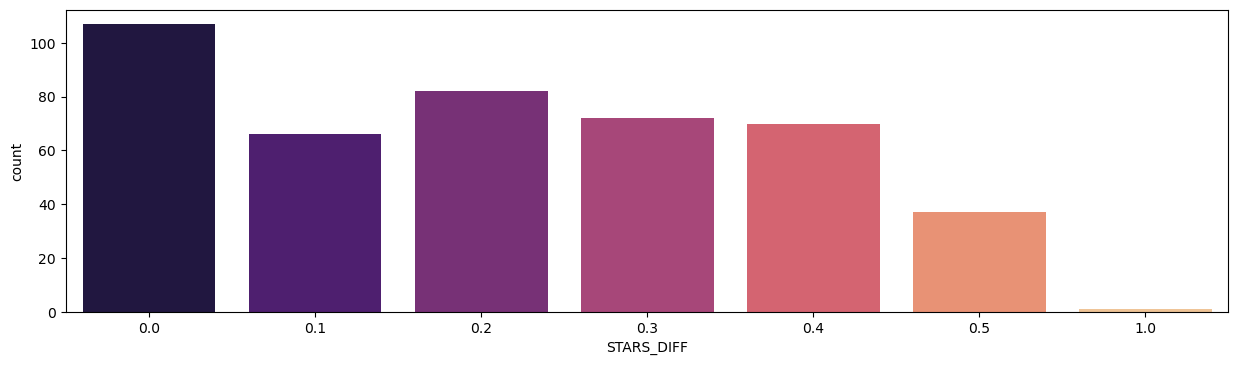

In [139]:
fig = plt.figure(figsize =(15,4), dpi = 100) 
sns.countplot(x = 'STARS_DIFF', data = fandango, palette='magma')

**На этом графике мы видим, что количество фильм с разницей между RATING и STAR значительно больше тех фильмов, у которых это значение совпадает, что очень странно. А один из фильмов имеет разницу в 1 звезду между отображаемым рейтингом и истинным рейтингом!**

In [141]:
fandango.loc[fandango['STARS_DIFF'] == 1] #НАШЛИ ЭТОТ ФИЛЬМ

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Часть 3: Сравнение рейтингов Fandango с рейтингами других компаний

In [142]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [143]:
all_sites.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [144]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [145]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Рейтинги от Rotten Tomatoes

Начнём с рейтингов Rotten Tomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги. 

**Нарисуем график scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами.**

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

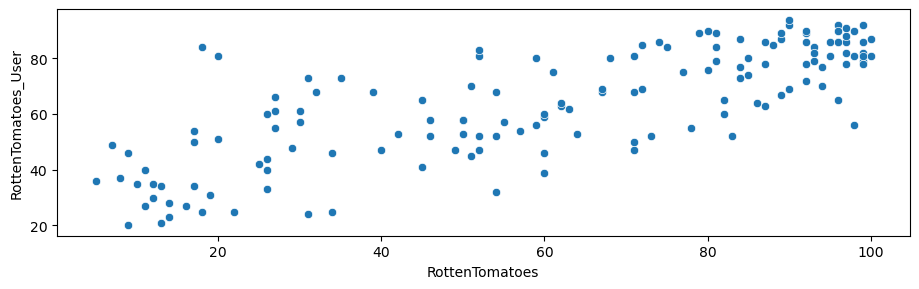

In [146]:
plt.figure(figsize=(11,3),dpi=100)

sns.scatterplot(x='RottenTomatoes',y='RottenTomatoes_User',data=all_sites)

Давайте изучим численную разницу между этими двумя рейтингами. Мы посчитаем эту разницу с помощью формулы RottenTomatoes-RottenTomatoes_User. Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.

In [147]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [148]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Теперь давайте посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то давайте сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

In [157]:
all_sites['Rotten_Diff'].apply(lambda num:abs(num)).mean()

15.095890410958905

**Нарисуем график распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.**

Text(0.5, 1.0, 'Разница между оценкой от экспертов и оценкой от пользователей')

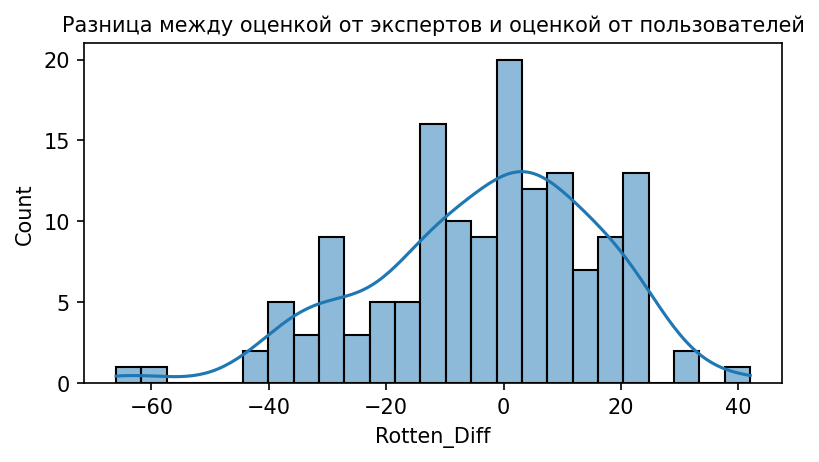

In [160]:
plt.figure(figsize=(6,3),dpi=150)

sns.histplot(data=all_sites, x = 'Rotten_Diff', kde = True, bins = 25)
plt.title('Разница между оценкой от экспертов и оценкой от пользователей', size = 10)


**Нарисуем график распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.**

Text(0.5, 1.0, 'Абсолютная разница между оценками критиков и оценками пользователей')

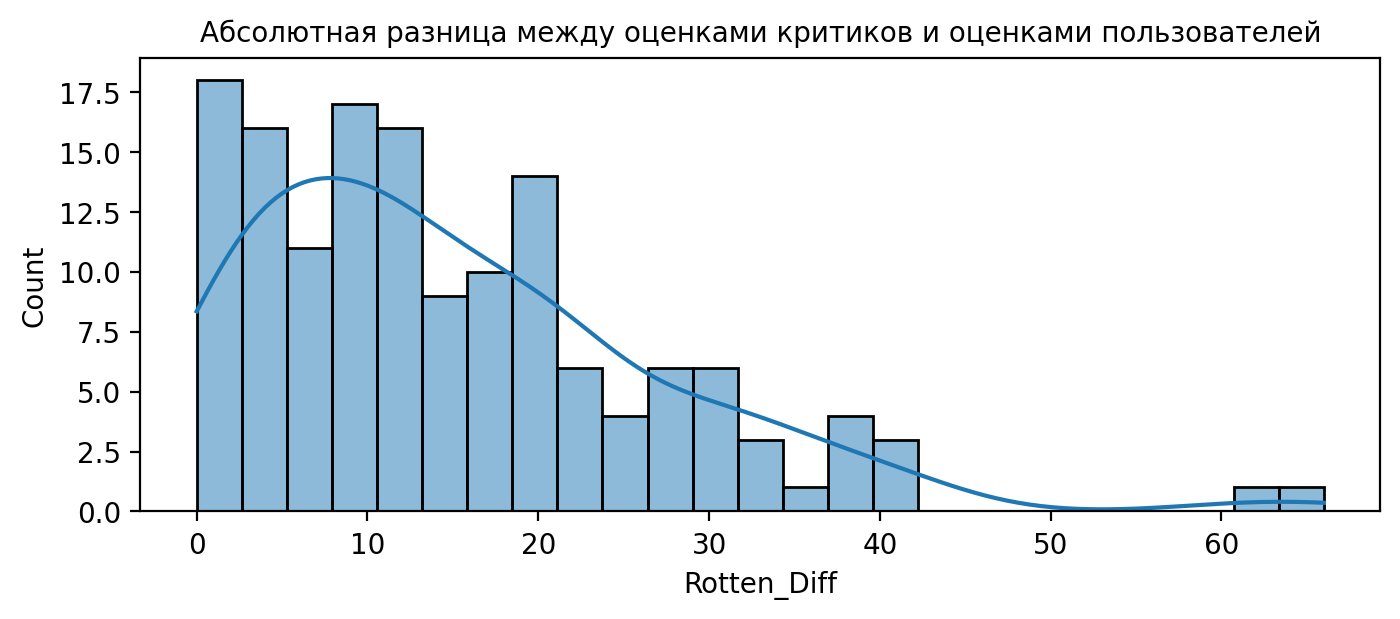

In [162]:
plt.figure(figsize=(8,3),dpi=200)

sns.histplot(data=all_sites, x = all_sites['Rotten_Diff'].apply(lambda num:abs(num)), kde = True, bins = 25)
plt.title('Абсолютная разница между оценками критиков и оценками пользователей', size = 10)

**Давайте выясним, какие фильмы наиболее отличаются по рейтингам. Поскольку мы вычисляли разницу рейтингов по формуле Critics Rating - Users Rating, большие по модулю отрицательные значения говорят о том, что пользователи в среднем оценили эти фильмы намного выше, чем критики.**

In [165]:
#5 ФИЛЬМОВ, КОТОРЫЕ В СРЕДНЕМ БЫЛИ ВЫШЕ ВСЕГО ОЦЕНЕНЫ ПОЛЬЗОВАТЕЛЯМИ

all_sites.nsmallest(5, 'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [166]:
##5 ФИЛЬМОВ, КОТОРЫЕ В СРЕДНЕМ БЫЛИ ВЫШЕ ВСЕГО ОЦЕНЕНЫ КРИТИКАМИ

all_sites.nlargest(5, 'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## Рейтинги от MetaCritic

**График scatterplot для сравнения рейтингов Metacritic и Metacritic User.**

(0.0, 100.0)

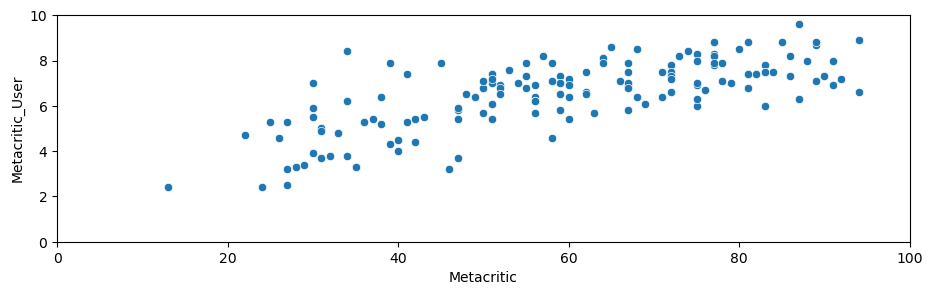

In [167]:
plt.figure(figsize=(11,3),dpi=100)

sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

## Рейтинги от IMDB

Посмотрим на рейтинги от IMDB. Обратите внимание, что Metacritic и IMDB показывают количество голосов. Посмотрим на наиболее популярные фильмы на этих двух платформах.

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

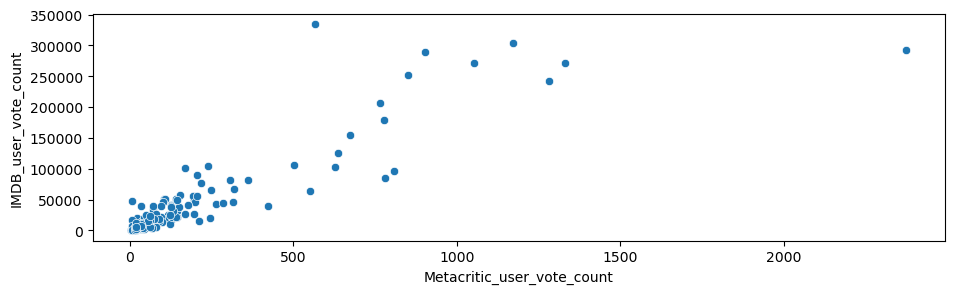

In [168]:
plt.figure(figsize=(11,3),dpi=100)

sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

**Здесь мы видим два "выброса" - точки, очень сильно отличающиеся от всех других точек. Один фильм получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic. Что это за фильм?**

In [169]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Аналогично посмотрим для Metacritic?**

In [170]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Сравнение рейтингов Fandango с рейтингами других компаний

Давайте наконец выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

**Объединим таблицу fandango с таблицей all_sites. Не каждый фильм в таблице Fandango найдётся в таблице all_sites, потому что некоторые фильмы Fandango имеют очень мало отзывов или вообще не имеют отзывов. Но мы хотим сравнивать только те фильмы, которые есть в обеих таблицах. Поэтому сделаем объединение "*inner* merge" двух наборов данных, сопоставляя строки по колонке FILM.**

In [171]:
df = pd.merge(fandango, all_sites, how = 'inner', on = 'FILM')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   STARS_DIFF                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_Diff                 145 non

In [178]:
df #НА ЭТАПЕ ОБЪЕДИНЕНИЯ МЫ "ПОТЕРЯЛИ" КАКОЙ-ТО ОДИН ФИЛЬМ, КОТОРОГО НЕ БЫЛО В ДАТАФРЕЙМЕ FANDANGO (НО ЭТО СЕЙЧАС НЕ ТАК ВАЖНО)

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,68,6.4,6.7,19,5289,24,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,87,6.3,7.0,18,1107,14,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,67,7.0,7.8,4,732,9,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,86,7.3,7.4,14,696,9,4.8,4.3,4.3,3.6,3.7


### Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

Компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, чем шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нам нужно *нормализовать* эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.

In [179]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
STARS_DIFF                         0.5
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
RT_Norm                            5.0
RTU_Norm                           4.7
Meta_Norm                          4.7
Meta_U_Norm                        4.8
IMDB_Norm                          4.3
Name: max, dtype: float64

In [180]:
df['RT_Norm']=np.round(df['RottenTomatoes']/20, 1)
df['RTU_Norm']=np.round(df['RottenTomatoes_User']/20, 1)

df['Meta_Norm']=np.round(df['Metacritic']/20, 1)
df['Meta_U_Norm']=np.round(df['Metacritic_User']/2, 1)

df['IMDB_Norm']=np.round(df['IMDB']/2, 1)

In [181]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Создадим DataFrame с названием norm_scores, в котором оставим только нормализованные рейтинги + колонки STARS и RATING из исходной таблицы fandango.**

In [182]:
norm_scores = pd.DataFrame(data = df, columns=['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm'])

In [183]:
norm_scores

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


### Сравнение распределений рейтингов от разных компаний


А теперь момент истины! Действильно ли Fandango показывал неоправданно высокие рейтинги? Мы уже знаем, что отображаемые значения RATING были выше значений STARS. Но являются ли сами рейтинги в среднем более высокими, чем у других компаний?

<AxesSubplot:ylabel='Density'>

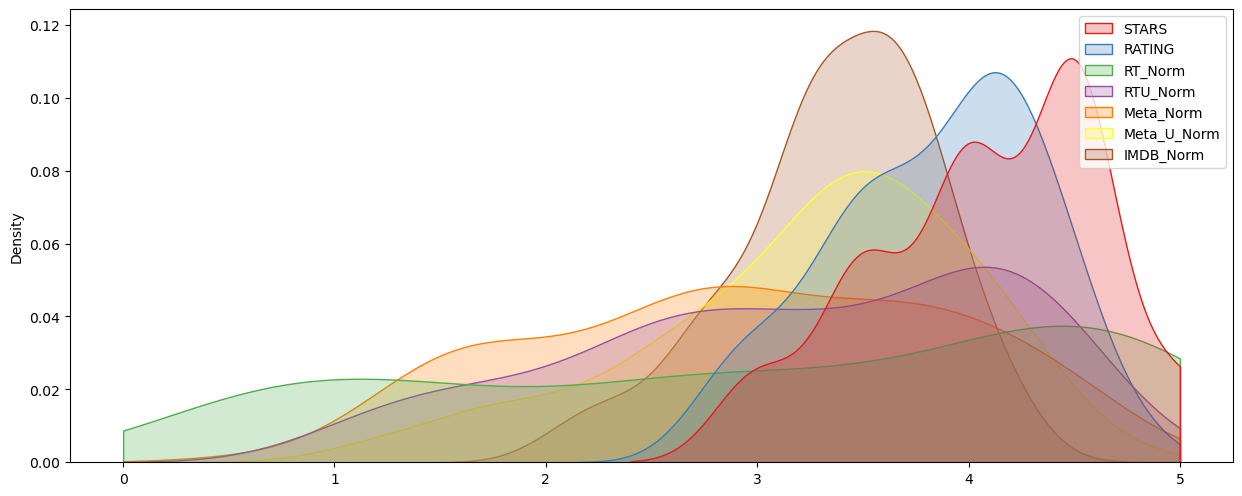

In [184]:
fig = plt.figure(figsize =(15,6), dpi = 100) 

sns.kdeplot(data=norm_scores,clip=[0,5], shade = True, palette = 'Set1')

In [190]:
#ВСТАВИМ ФУНКЦИЮ ДЛЯ ПЕРЕМЕЩЕНИЯ ЛЕГЕНДЫ, Т.К. НА МОМЕНТ ВЫПОЛНЕНИЯ ПРОЕКТА ПАРАМЕТР LOC ДЛЯ PLT.LEGEND() НЕ РАБОТАЛ C KDEPLOT
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

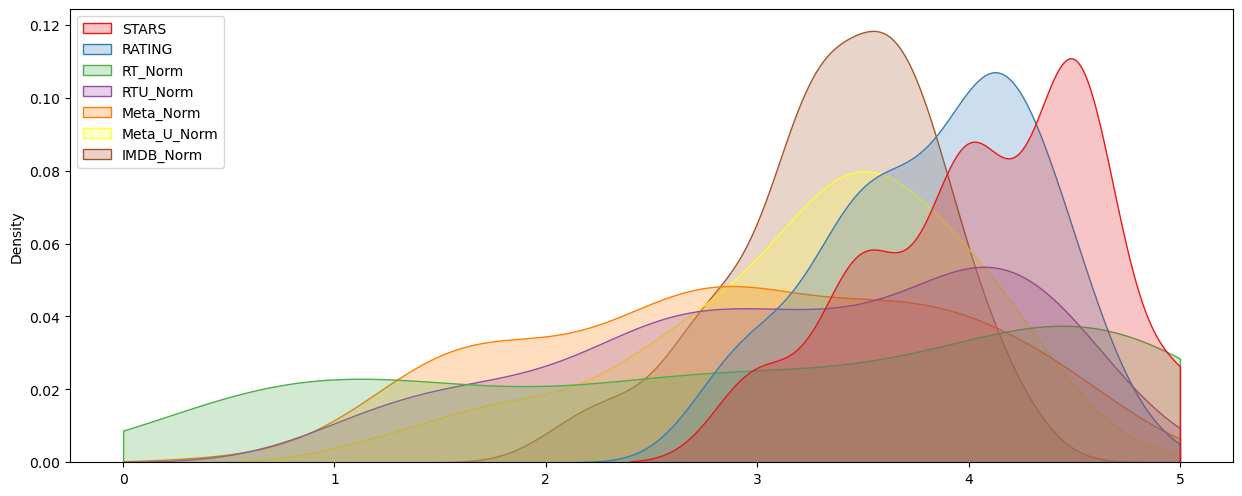

In [191]:
fig, ax = plt.subplots(figsize =(15,6), dpi = 100) #СОЗД. ЕЩЕ ПЕРЕМЕННУЮ АХ И ЗАМЕНИЛИ PLT.FIGURE НА PLT.SUBPLOT

sns.kdeplot(data=norm_scores,clip=[0,5], shade = True, palette = 'Set1')

move_legend(ax, "upper left") #КОМАНДА ДЛЯ ПЕРЕМЕЩЕНИЯ ЛЕГЕНДЫ

**Рейтинги Fandango очень сдвинуты вправо. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Давайте сравним только эти два распределения.** 

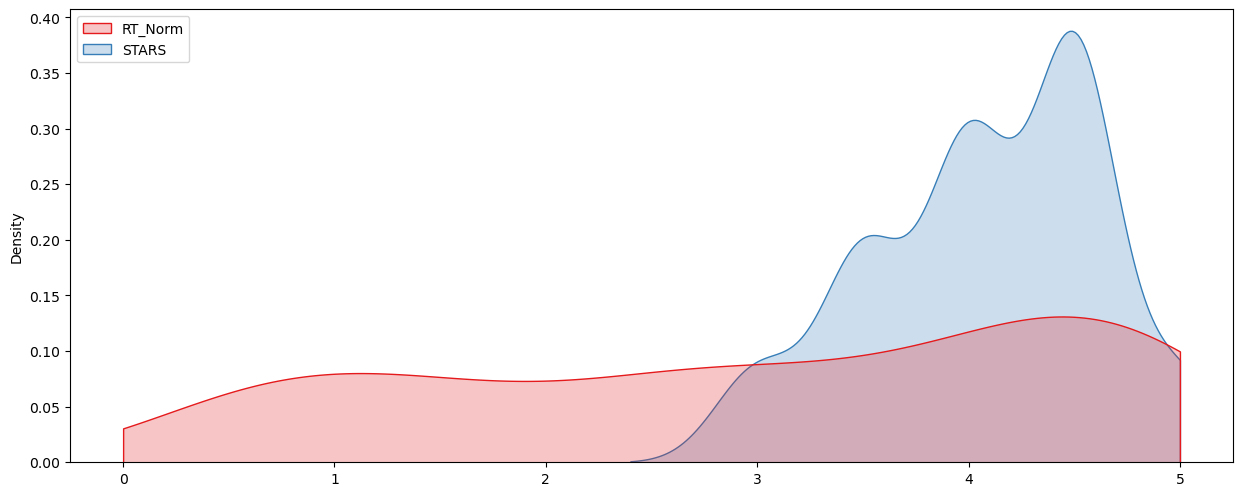

In [193]:
fig, ax = plt.subplots(figsize =(15,6), dpi = 100)

sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5], shade = True, palette = 'Set1')

move_legend(ax, "upper left")

**Дополнительно создадим гистограмму, сравнивающую все нормализованные рейтинги.**

<AxesSubplot:ylabel='Count'>

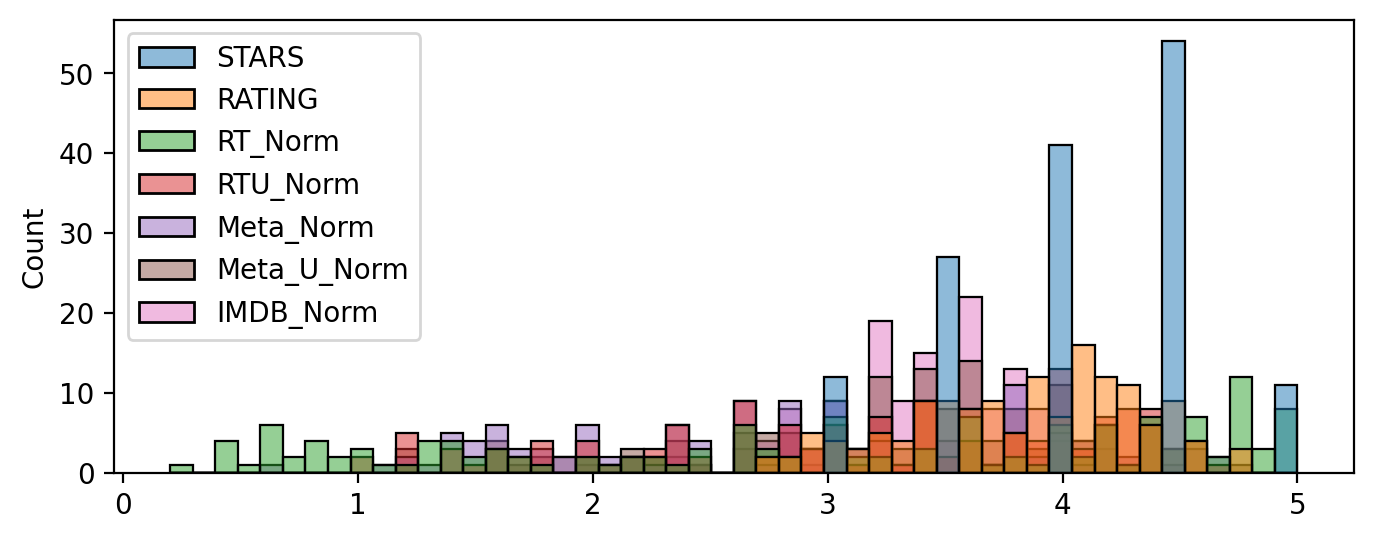

In [194]:
plt.figure(figsize=(8,3),dpi=200)

sns.histplot(data=norm_scores, bins = 50)

**На данном графике хорошо видно, что значения STARS слишком сильно завышены по сравнению с другими колонками**


### Как различные компании оценивают фильмы с наименьшими рейтингами?

**Создадим график clustermap для всех нормализованных рейтингов. Обратите внимание на отличия в рейтингах между разными компаниями. Фильмы с высокими рейтингами должны попадать в одни кластеры, а фильмы с низкими рейтингами в другие кластеры.**

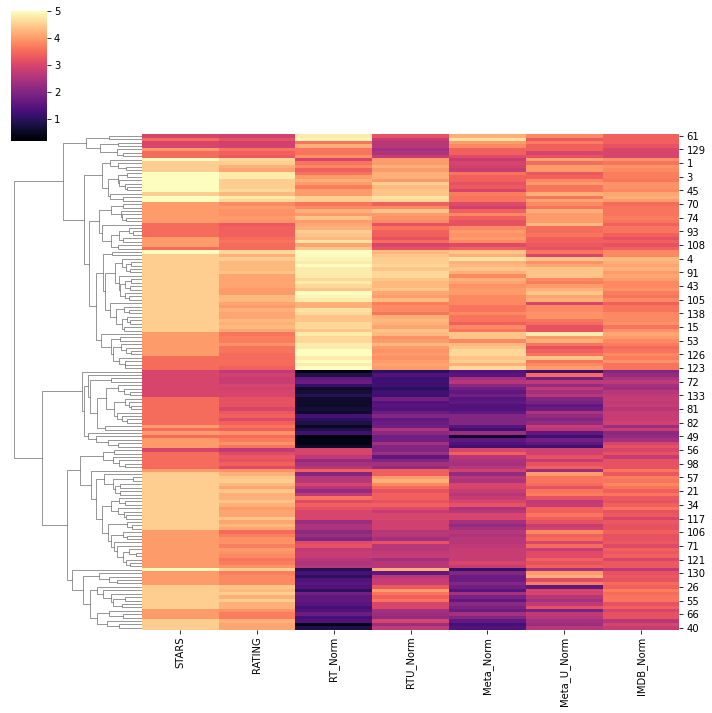

In [195]:
sns.clustermap(norm_scores, cmap = 'magma', col_cluster=False)

**Мы видели, что рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов. Давайте посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic - какие это 10 фильмов? Какие нормализованные рейтинги дали этим фильмам другие компании?**

In [196]:
norm_films = df[['FILM','STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [197]:
worst_films = norm_films.nsmallest(10, 'RT_Norm')

In [198]:
worst_films

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


**Визуализируем распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами.**

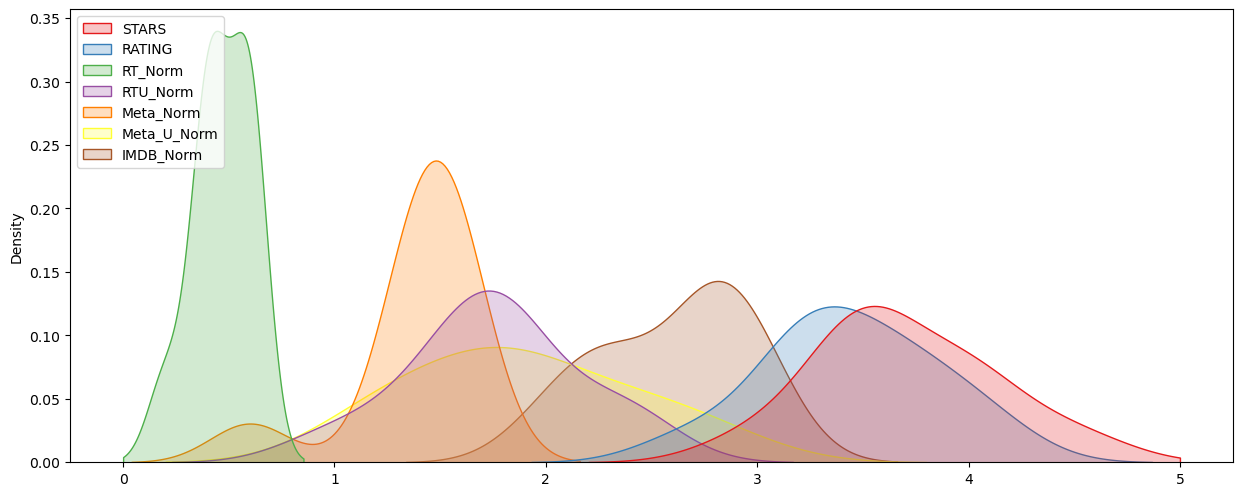

In [199]:
fig, ax = plt.subplots(figsize =(15,6), dpi = 100) 

sns.kdeplot(data=worst_films,clip=[0,5], shade = True, palette = 'Set1')

move_legend(ax, "upper left")

**Здесь мы видим, что 10 наихудших фильмов по версии остальным компаний получили достаточно высокую оценку от Fandango**

---
----
    
**Больше всего отличается фильм [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) от других компаний!**

In [200]:
norm_films.iloc[25]

FILM           Taken 3 (2015)
STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
Name: 25, dtype: object

In [201]:
0.4+2.3+1.3+2.3+3

9.3

In [202]:
9.3/5 #СРЕДНИЙ РЕЙТИНГ ДЛЯ ДАННОГО ФИЛЬМА ОТ ДРУГИХ СЕРВИСОВ

1.86

----